In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fn

In [2]:
df_eclipse = pd.read_csv('data/eclipse_bug_report_data.csv')

In [3]:
df_eclipse.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,RECOMMENDERS-467951,22-05-2015,Core,RECOMMENDERS,LogTraceException in ProposalUtils.toMethodNam...,The following incident was reported via the au...,recommenders-inbox,error-reports-inbox,fixed,1.0,closed,6.0,27-05-2015,0.0,2.0,27-05-2015,5.0,normal,2.0,Functional
1,QVTO-463396,29-03-2015,Engine,QVTO,CCE in DecorationNodeImpl.eSet (159),NaN,serg.boyko2011,error-reports-inbox,fixed,1.0,resolved,4.0,01-04-2015,0.0,8.0,31-03-2015,2.0,normal,2.0,Functional
2,EQUINOX-530069,20-01-2018,Compendium,EQUINOX,[http servlet] During dispatching javax.servle...,Original issue https://issues.liferay.com/brow...,raymond.auge,raymond.auge,fixed,1.0,resolved,4.0,22-01-2018,0.0,3.0,22-01-2018,2.0,normal,2.0,Infrastructure
3,NATTABLE-422482,25-11-2013,Core,NATTABLE,Left border of NatTable is not drawn,Rendering a NatTable on a Composite with margi...,dirk.fauth,dirk.fauth,fixed,1.0,closed,6.0,23-07-2014,0.0,3.0,25-11-2013,0.0,normal,2.0,Usability
4,WTP_JAVA_EE_TOOLS-116294,14-11-2005,jst.j2ee,WTP_JAVA_EE_TOOLS,NPE while importing EAR with utility jar,Import and EAR which has EJb and Ejb client tr...,jsholl,nagrawal,fixed,1.0,closed,6.0,09-12-2005,0.0,4.0,15-11-2005,1.0,blocker,6.0,Functional


In [4]:
df_eclipse.shape

(10090, 20)

In [5]:
df_eclipse.count()

bug_id                  10059
creation_date            9626
component_name           9626
product_name             9626
short_description        9626
long_description         9555
assignee_name            9622
reporter_name            9622
resolution_category      9622
resolution_code          9622
status_category          9622
status_code              9622
update_date              9622
quantity_of_votes        9622
quantity_of_comments     9618
resolution_date          9618
bug_fix_time             9618
severity_category        9618
severity_code            9618
label                     200
dtype: int64

In [6]:
df_eclipse = df_eclipse.dropna()

In [7]:
df_eclipse.count()

bug_id                  198
creation_date           198
component_name          198
product_name            198
short_description       198
long_description        198
assignee_name           198
reporter_name           198
resolution_category     198
resolution_code         198
status_category         198
status_code             198
update_date             198
quantity_of_votes       198
quantity_of_comments    198
resolution_date         198
bug_fix_time            198
severity_category       198
severity_code           198
label                   198
dtype: int64

In [8]:
df_mozilla = pd.read_csv('data/mozilla_bug_report_data.csv')

In [9]:
df_mozilla.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,label
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6,Regression
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\n\nCurrent code:\nmenuite...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2,Performance
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6,Functional
3,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2,Functional
4,DEVELOPER.MOZILLA.ORG-416840,2008-02-11,General,DEVELOPER.MOZILLA.ORG,Fix and cruft,Since we removed the breadcrumbs and title-ove...,nobody,jorendorff,fixed,1,resolved,4,2012-09-18,0,4,2008-02-12,1,normal,2,Regression


In [10]:
df_mozilla.shape

(9967, 20)

In [11]:
df_mozilla.count()

bug_id                  9967
creation_date           9967
component_name          9967
product_name            9967
short_description       9966
long_description        9889
assignee_name           9967
reporter_name           9967
resolution_category     9967
resolution_code         9967
status_category         9967
status_code             9967
update_date             9967
quantity_of_votes       9967
quantity_of_comments    9967
resolution_date         9967
bug_fix_time            9967
severity_category       9967
severity_code           9967
label                    200
dtype: int64

In [12]:
df_mozilla = df_mozilla.dropna()

In [13]:
df_mozilla.count()

bug_id                  200
creation_date           200
component_name          200
product_name            200
short_description       200
long_description        200
assignee_name           200
reporter_name           200
resolution_category     200
resolution_code         200
status_category         200
status_code             200
update_date             200
quantity_of_votes       200
quantity_of_comments    200
resolution_date         200
bug_fix_time            200
severity_category       200
severity_code           200
label                   200
dtype: int64

<h2><b>Data Visualization</b></h2>

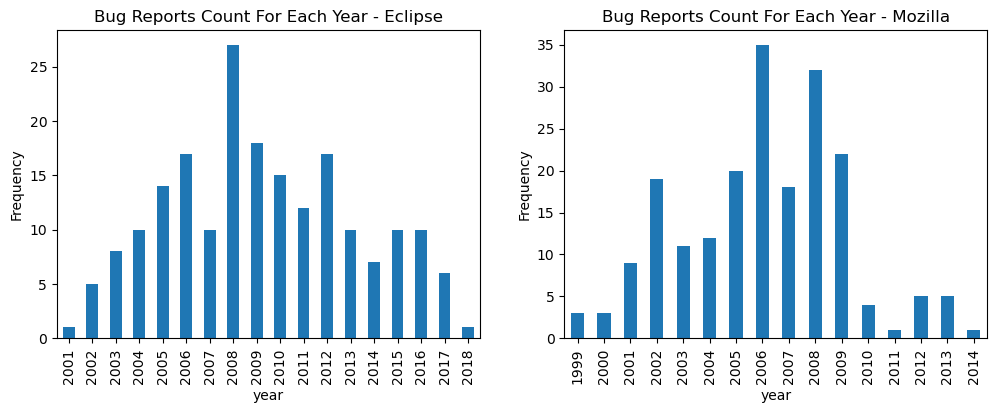

In [14]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn.year_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn.year_plot(df_mozilla, "Mozilla", False)

plt.show()

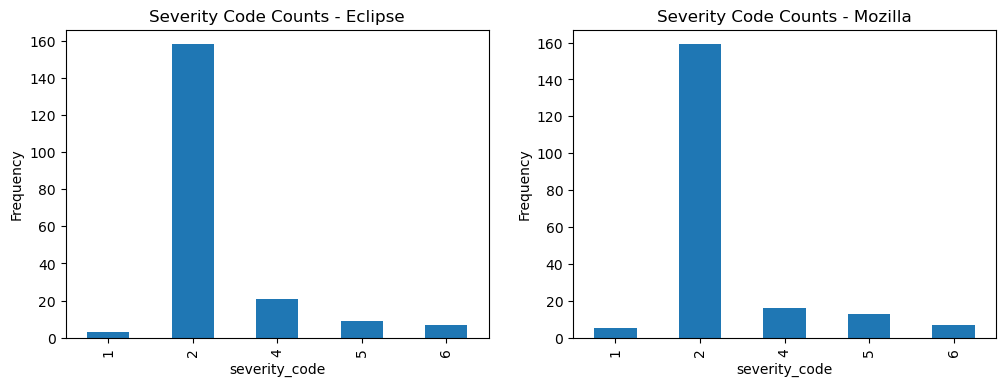

In [15]:
df_eclipse['severity_code'] = df_eclipse['severity_code'].astype(int)

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn.severity_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn.severity_plot(df_mozilla, "Mozilla")
plt.show()

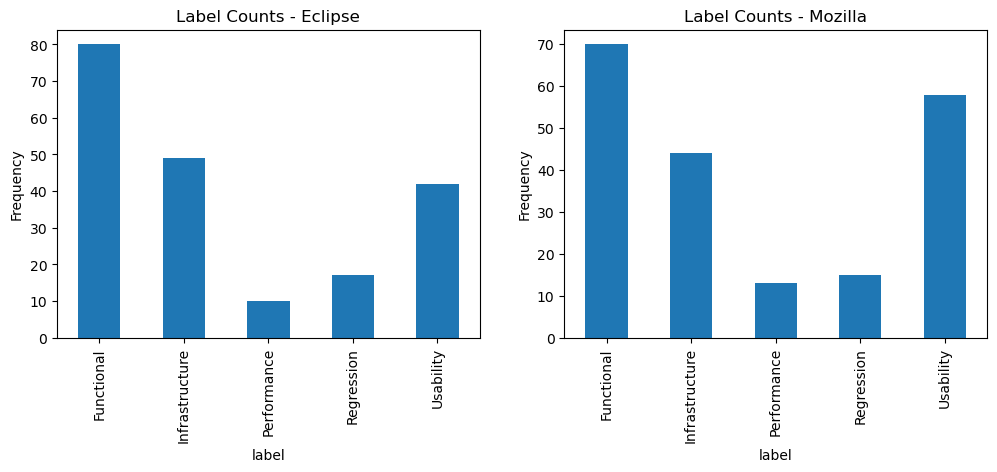

In [16]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
fn.label_plot(df_eclipse, "Eclipse")

plt.subplot(1,2,2)
fn.label_plot(df_mozilla, "Mozilla")
plt.show()

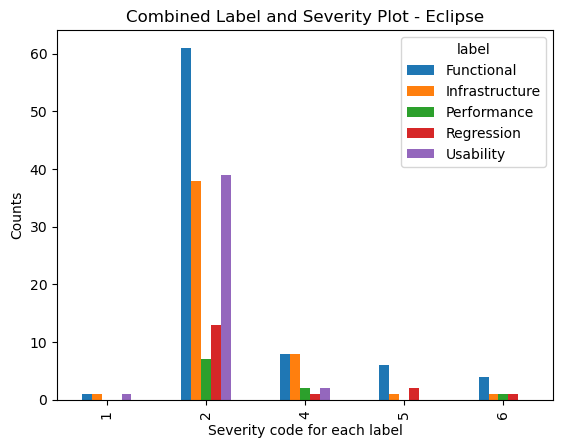

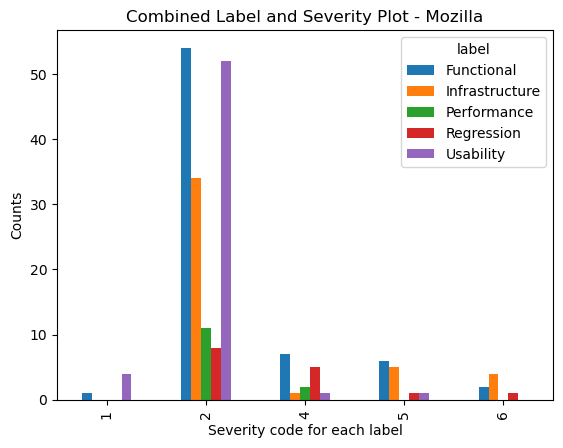

In [21]:
fn.label_sev_plot(df_eclipse, "Eclipse")
fn.label_sev_plot(df_mozilla, "Mozilla")